In [1]:
!pip install gensim nltk pandas

In [2]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

nltk.download('punkt')

df = pd.read_csv('steam_games.csv')

[nltk_data] Downloading package punkt to /home/zadhart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Primeira questão

In [3]:
def check_word_in_texts(processed_texts, word):
    word = word.lower()
    word_in_texts = []
    
    for i, doc in enumerate(processed_texts):
        if word in doc:
            if word in model.wv:
                return True
    
    return False

In [4]:
def train_word2vec(processed_texts):
    model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=1, workers=20)
    return model

In [5]:
def find_similar_words(model, query_words, top_n=3):
    similar_words = {}
    for query_word in query_words:
        if query_word in model.wv:
            similar_words[query_word] = model.wv.most_similar(query_word, topn=top_n)
        else:
            similar_words[query_word] = None
    return similar_words

In [6]:
def find_documents_with_words(processed_texts, words):
    documents_with_words = {}
    for i, doc in enumerate(processed_texts):
        for word in words:
            if word in doc:
                if word not in documents_with_words:
                    documents_with_words[word] = []
                documents_with_words[word].append(i)
    return documents_with_words

In [7]:
def calculate_dm10(model, document, query_word):
    if query_word not in model.wv:
        return float('inf')
    
    similar_words = model.wv.most_similar(query_word, topn=10)
    distances = []
    for similar_word, _ in similar_words:
        if similar_word in document:
            distance = model.wv.distance(query_word, similar_word)
            distances.append(distance)
    
    if distances:
        return np.mean(distances)
    else:
        return float('inf')

In [8]:
def find_top_documents(processed_texts, model, query_words):
    top_documents = {}
    for query_word in query_words:
        dm10_scores = []
        for i, document in enumerate(processed_texts):
            dm10_score = calculate_dm10(model, document, query_word)
            dm10_scores.append((i, dm10_score))
        
        dm10_scores.sort(key=lambda x: x[1])
        top_documents[query_word] = dm10_scores[:3]
    return top_documents

### Letra A

In [9]:
df['tokenized_description'] = df['filtered_full_description'].apply(lambda x: word_tokenize(x.lower()))

In [10]:
model = train_word2vec(df['tokenized_description'])

In [11]:
df['sentence_vector'] = df['tokenized_description'].apply(lambda tokens: sum([model.wv[token] for token in tokens if token in model.wv]) / len(tokens))

### Letra B

In [12]:
print(check_word_in_texts(df['tokenized_description'], "drugs"))

False


In [13]:
query_words = ["giant", "sword", "star", "shield", "war"]

In [14]:
similar_words = find_similar_words(model, query_words)
print("Palavras semelhantes para cada consulta:")
for query_word, words in similar_words.items():
    print(f"{query_word}: {words}")

Palavras semelhantes para cada consulta:
giant: [('spid', 0.8095541596412659), ('gigantic', 0.782721221446991), ('insect', 0.7366396188735962)]
sword: [('axe', 0.8107487559318542), ('blad', 0.7818382382392883), ('bow', 0.7706913948059082)]
star: [('gameartdink', 0.804332971572876), ('artdink', 0.7321211695671082), ('cryomanc', 0.6846457719802856)]
shield: [('cannon', 0.7995219230651855), ('protectiv', 0.7819476127624512), ('invisibility', 0.7720896005630493)]
war: [('conflict', 0.698723554611206), ('unrest', 0.6172865033149719), ('ww', 0.6167932152748108)]


### Letra C

In [15]:
top_documents = find_top_documents(df['tokenized_description'], model, ["shield"])

In [16]:
print(top_documents)

{'shield': [(186, 0.20047807693481445), (263, 0.20047807693481445), (511, 0.20047807693481445)]}


In [17]:
print("\nDocumentos mais próximos para cada palavra de consulta:\n")
for query_word, docs in top_documents.items():
    print(f"Palavra: {query_word}")
    for doc_index, score in docs:
        print(f"Documento {doc_index}: {df['tokenized_description'][doc_index]} (Distância: {score})\n\n")


Documentos mais próximos para cada palavra de consulta:

Palavra: shield
Documento 186: ['contentfollowing', 'ye', 'strif', 'remaim', 'reef', 'fallen', 'lawlessnes', 'sent', 'personally', 'investigat', 'recent', 'unrest', 'upon', 'arriv', 'soon', 'discov', 'crim', 'prison', 'eld', 'organized', 'escap', 'beyond', 'authority', 'pursu', 'fugitiv', 'deep', 'reef', 'explor', 'new', 'regiom', 'awaken', 'new', 'pow', 'earn', 'powerful', 'weapom', 'uncov', 'long', 'lost', 'awoken', 'secret', 'hunt', 'weapom', 'arm', 'geartak', 'aim', 'fabled', 'burden', 'wield', 'exotic', 'hand', 'cannon', 'ace', 'dreaming', 'citytravers', 'hall', 'shattered', 'thron', 'claim', 'powerful', 'treasur', 'fight', 'corruption', 'plag', 'new', 'superscrush', 'foe', 'weapom', 'fir', 'blind', 'pool', 'radianc', 'strik', 'shadow', 'terrifying', 'last', 'pinnacl', 'experienc', 'last', 'wish', 'await', 'firete', 'storm', 'gat', 'guardian'] (Distância: 0.20047807693481445)


Documento 263: ['gamehumanity', 'sieg', 'full'

### Letra D

In [18]:
top_documents = find_top_documents(df['tokenized_description'], model, query_words)

In [19]:
print("\nDocumentos mais próximos para cada palavra de consulta:\n")
for query_word, docs in top_documents.items():
    print(f"Palavra: {query_word}")
    for doc_index, score in docs:
        print(f"Documento {doc_index}: {df['tokenized_description'][doc_index]} (Distância: {score})\n\n")


Documentos mais próximos para cada palavra de consulta:

Palavra: giant
Documento 1256: ['gamecav', 'qud', 'scienc', 'fantasy', 'roguelik', 'epic', 'steeped', 'retrofuturism', 'deep', 'simulation', 'swath', 'sentient', 'plant', 'com', 'inhabit', 'exotic', 'world', 'chisel', 'lay', 'civilizatiom', 'decid', 'dying', 'earth', 'verg', 'rol', 'mutant', 'indigen', 'dun', 'jungl', 'qud', 'play', 'descendant', 'one', 'remaining', 'toxic', 'arboret', 'ekuemekiyy', 'holy', 'city', 'arcology', 'ibul', 'crust', 'mort', 'arriv', 'jopp', 'along', 'far', 'rim', 'great', 'salt', 'desert', 'around', 'moistur', 'farm', 'tend', 'grov', 'viridian', 'watervin', 'hut', 'wrought', 'rock', 'salt', 'brinestalk', 'horizon', 'jungl', 'strangl', 'chrom', 'steepl', 'rusted', 'archway', 'earth', 'beyond', 'fabled', 'spindl', 'ris', 'fray', 'pierc', 'clutch', 'rifl', 'vibroblad', 'tattered', 'scroll', 'poison', 'sting', 'hypnotized', 'goat', 'approach', 'watervin', 'lift', 'brim', 'straw', 'hat', 'say', 'liv', 'dri

## Segunda questão

### Letra A

In [20]:
def preprocess_text(text):
    return word_tokenize(text.lower())

In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(words, [i]) for i, words in enumerate(df['tokenized_description'])]

model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=20, epochs=100)

df['doc_vector'] = df['tokenized_description'].apply(lambda x: model.infer_vector(x))

print(df[['filtered_full_description', 'doc_vector']])

                               filtered_full_description  \
0      gameplay play onlin via local wif attempt prep...   
1      glob offensiv cs go expand upon action gamepla...   
2      gamefall guy ultimat knockout fling hord conte...   
3      gameparadox development studi bring sequel one...   
4      gamediv world destiny explor mysteri sol syst ...   
...                                                  ...   
59913  gamesoc distancing full effect need eat mak wa...   
59914  contentth jed bundl jed arm settempted lightsa...   
59915  contentth sith bundl raid arm setdefiant techn...   
59916  gamepatch quest action roguevan mount rid ever...   
59917  gameev wondered dragom com talking animal ent ...   

                                              doc_vector  
0      [-3.453115, -0.972214, 0.2765081, 0.83381003, ...  
1      [-3.223682, 0.35280555, 0.6080426, 1.1869792, ...  
2      [-0.5681677, -0.34936777, 0.14109874, -0.64212...  
3      [-2.2675097, -0.66927576, 1.5496889,

In [22]:
df.head()

,url,name,labeled_user_reviews,full_description,filtered_full_description,tokenized_description,sentence_vector,doc_vector
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Positive,gameplay player online via local wifi attempt ...,gameplay play onlin via local wif attempt prep...,"[gameplay, play, onlin, via, local, wif, attem...","[-0.13469973, -0.36233595, 0.11336786, 0.05820...","[-3.453115, -0.972214, 0.2765081, 0.83381003, ..."
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Positive,global offensive cs go expands upon action gam...,glob offensiv cs go expand upon action gamepla...,"[glob, offensiv, cs, go, expand, upon, action,...","[-0.71866125, -0.28505898, -0.21160099, -0.083...","[-3.223682, 0.35280555, 0.6080426, 1.1869792, ..."
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,Positive,gamefall guys ultimate knockout flings hordes ...,gamefall guy ultimat knockout fling hord conte...,"[gamefall, guy, ultimat, knockout, fling, hord...","[-3.311899e-05, -0.24487208, -0.1666118, 0.116...","[-0.5681677, -0.34936777, 0.14109874, -0.64212..."
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Positive,gameparadox development studio brings sequel o...,gameparadox development studi bring sequel one...,"[gameparadox, development, studi, bring, seque...","[-0.45759416, 0.46334544, -0.549383, -0.135935...","[-2.2675097, -0.66927576, 1.5496889, -1.656422..."
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Positive,gamedive world destiny explore mysteries solar...,gamediv world destiny explor mysteri sol syst ...,"[gamediv, world, destiny, explor, mysteri, sol...","[-0.46488443, -0.065530114, -0.40852723, 0.364...","[-1.5217057, -1.4967293, -0.6818556, 1.2423153..."


In [23]:
def convert_labeled_review(review):
    if review == "Positive":
        return 1
    return 0

X = df['doc_vector'].apply(lambda x: list(x)).tolist()
y = df["labeled_user_reviews"].apply(convert_labeled_review)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def print_model_performance_metrics(y_test, y_pred, model_name: str, vec_rep: str):
    print(f"Calculando métricas de performance do modelo: {model_name} com a representacao vetorial: {vec_rep}:\n")

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia: {accuracy:.2f}')
    
    precision = precision_score(y_test, y_pred)
    print(f'Precisão: {precision:.2f}')
    
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall:.2f}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1:.2f}')

    model_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nMatriz de Confusão do modelo: {model_name} com a representacao vetorial: {vec_rep}:\n\n{model_confusion_matrix}")

### Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
y_pred = logistic_regression_model.predict(X_test)

In [28]:
print_model_performance_metrics(y_test, y_pred, "Logistic Regression", "Doc2Vec")

Calculando métricas de performance do modelo: Logistic Regression com a representacao vetorial: Doc2Vec:

Acurácia: 0.70
Precisão: 0.51
Recall: 0.10
F1 Score: 0.16

Matriz de Confusão do modelo: Logistic Regression com a representacao vetorial: Doc2Vec:

[[12079   500]
 [ 4878   519]]


### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = nb_model.predict(X_test)

In [31]:
print_model_performance_metrics(y_test, y_pred, "Naive Bayes", "Doc2Vec")

Calculando métricas de performance do modelo: Naive Bayes com a representacao vetorial: Doc2Vec:

Acurácia: 0.68
Precisão: 0.44
Recall: 0.24
F1 Score: 0.31

Matriz de Confusão do modelo: Naive Bayes com a representacao vetorial: Doc2Vec:

[[10883  1696]
 [ 4082  1315]]


### SVM

In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_pred = svm_model.predict(X_test)

In [34]:
print_model_performance_metrics(y_test, y_pred, "SVM", "Doc2Vec")

Calculando métricas de performance do modelo: SVM com a representacao vetorial: Doc2Vec:

Acurácia: 0.70
Precisão: 0.00
Recall: 0.00
F1 Score: 0.00

Matriz de Confusão do modelo: SVM com a representacao vetorial: Doc2Vec:

[[12579     0]
 [ 5397     0]]


/home/zadhart/Projects/NLP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Letra B

In [35]:
!pip install tensorflow

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filtered_full_description'])

max_words = len(tokenizer.word_index)

sequences = tokenizer.texts_to_sequences(df['filtered_full_description'])

lengths = [len(seq) for seq in sequences]
max_len = int(np.mean(lengths))
embedding_dim = 100

print(f"max_words: {max_words}")
print(f"max_len: {max_len}")
print(f"embedding_dim: {embedding_dim}")

2024-10-20 15:55:07.145449: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 15:55:07.299394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 15:55:07.357445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 15:55:07.373146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 15:55:07.487233: I tensorflow/core/platform/cpu_feature_guar

max_words: 188588
max_len: 94
embedding_dim: 100


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['filtered_full_description'])
sequences = tokenizer.texts_to_sequences(df['filtered_full_description'])

X = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


/home/zadhart/Projects/NLP/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1729450514.439124   15427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729450514.442653   15427 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 15:55:14.613665: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.7052 - loss: 0.5644 - val_accuracy: 0.6980 - val_loss: 0.5447
Epoch 2/5
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.8074 - loss: 0.4156 - val_accuracy: 0.7094 - val_loss: 0.5819
Epoch 3/5
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.9038 - loss: 0.2337 - val_accuracy: 0.6914 - val_loss: 0.7319
Epoch 4/5
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.9556 - loss: 0.1169 - val_accuracy: 0.6812 - val_loss: 0.8971
Epoch 5/5
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.9793 - loss: 0.0597 - val_accuracy: 0.6828 - val_loss: 1.1984


In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia: {accuracy * 100:.2f}%')

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6818 - loss: 1.2149
Acurácia: 68.28%


## Questão 3

In [39]:
!pip install spacy

In [40]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:0031m27.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Letra A

In [41]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')

def extract_pos(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df['pos_tags'] = df['full_description'].apply(extract_pos)

print(df[['full_description', 'pos_tags']])

                                        full_description  \
0      gameplay player online via local wifi attempt ...   
1      global offensive cs go expands upon action gam...   
2      gamefall guys ultimate knockout flings hordes ...   
3      gameparadox development studio brings sequel o...   
4      gamedive world destiny explore mysteries solar...   
...                                                  ...   
59913  gamesocial distancing full effect need eat mak...   
59914  contentthe jedi bundle jedi armor settempted l...   
59915  contentthe sith bundle raider armor setdefiant...   
59916  gamepatch quest action roguevania mount ride e...   
59917  gameever wondered dragons come talking animals...   

                                                pos_tags  
0      [(gameplay, NOUN), (player, NOUN), (online, AD...  
1      [(global, PROPN), (offensive, PROPN), (cs, PRO...  
2      [(gamefall, NOUN), (guys, NOUN), (ultimate, AD...  
3      [(gameparadox, PROPN), (development,

### Letra B

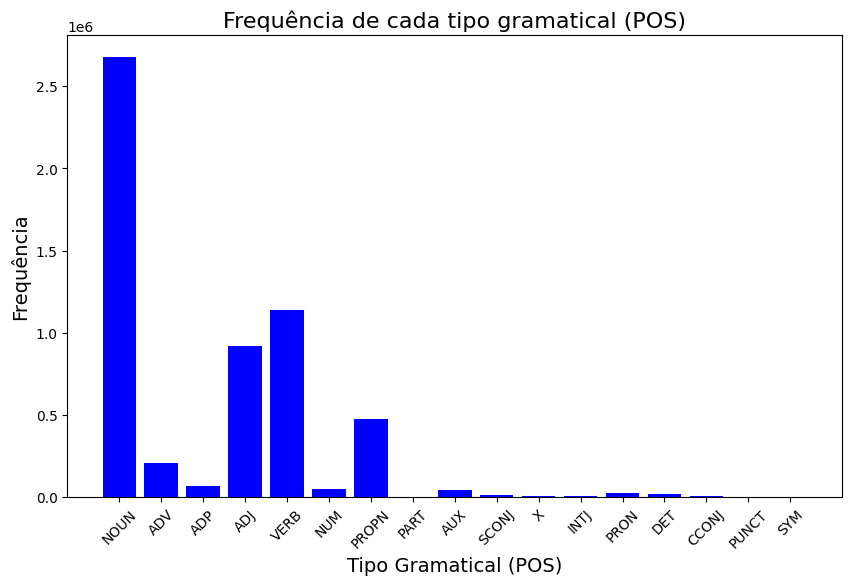

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

def extract_pos_only(pos_tags):
    return [pos for token, pos in pos_tags]

df['pos_only'] = df['pos_tags'].apply(extract_pos_only)

pos_frequencies = Counter([pos for sublist in df['pos_only'] for pos in sublist])

pos_df = pd.DataFrame(pos_frequencies.items(), columns=['POS', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS'], pos_df['Frequency'], color='blue')
plt.title('Frequência de cada tipo gramatical (POS)', fontsize=16)
plt.xlabel('Tipo Gramatical (POS)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Letra C

In [43]:
def extract_entities(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    places = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    return {'persons': persons, 'places': places}

df['entities'] = df['full_description'].apply(extract_entities)

df['persons'] = df['entities'].apply(lambda x: x['persons'])
df['places'] = df['entities'].apply(lambda x: x['places'])

print(df[['full_description', 'persons', 'places']])

                                        full_description  \
0      gameplay player online via local wifi attempt ...   
1      global offensive cs go expands upon action gam...   
2      gamefall guys ultimate knockout flings hordes ...   
3      gameparadox development studio brings sequel o...   
4      gamedive world destiny explore mysteries solar...   
...                                                  ...   
59913  gamesocial distancing full effect need eat mak...   
59914  contentthe jedi bundle jedi armor settempted l...   
59915  contentthe sith bundle raider armor setdefiant...   
59916  gamepatch quest action roguevania mount ride e...   
59917  gameever wondered dragons come talking animals...   

                                                 persons       places  
0                                                     []           []  
1                                        [doug lombardi]           []  
2                                                     []       

In [44]:
df.head()

,url,name,labeled_user_reviews,full_description,filtered_full_description,tokenized_description,sentence_vector,doc_vector,pos_tags,pos_only,entities,persons,places
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Positive,gameplay player online via local wifi attempt ...,gameplay play onlin via local wif attempt prep...,"[gameplay, play, onlin, via, local, wif, attem...","[-0.13469973, -0.36233595, 0.11336786, 0.05820...","[-3.453115, -0.972214, 0.2765081, 0.83381003, ...","[(gameplay, NOUN), (player, NOUN), (online, AD...","[NOUN, NOUN, ADV, ADP, ADJ, NOUN, NOUN, VERB, ...","{'persons': [], 'places': []}",[],[]
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Positive,global offensive cs go expands upon action gam...,glob offensiv cs go expand upon action gamepla...,"[glob, offensiv, cs, go, expand, upon, action,...","[-0.71866125, -0.28505898, -0.21160099, -0.083...","[-3.223682, 0.35280555, 0.6080426, 1.1869792, ...","[(global, PROPN), (offensive, PROPN), (cs, PRO...","[PROPN, PROPN, PROPN, VERB, VERB, SCONJ, NOUN,...","{'persons': ['doug lombardi'], 'places': []}",[doug lombardi],[]
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,Positive,gamefall guys ultimate knockout flings hordes ...,gamefall guy ultimat knockout fling hord conte...,"[gamefall, guy, ultimat, knockout, fling, hord...","[-3.311899e-05, -0.24487208, -0.1666118, 0.116...","[-0.5681677, -0.34936777, 0.14109874, -0.64212...","[(gamefall, NOUN), (guys, NOUN), (ultimate, AD...","[NOUN, NOUN, ADJ, NOUN, NOUN, NOUN, NOUN, ADV,...","{'persons': [], 'places': []}",[],[]
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Positive,gameparadox development studio brings sequel o...,gameparadox development studi bring sequel one...,"[gameparadox, development, studi, bring, seque...","[-0.45759416, 0.46334544, -0.549383, -0.135935...","[-2.2675097, -0.66927576, 1.5496889, -1.656422...","[(gameparadox, PROPN), (development, PROPN), (...","[PROPN, PROPN, NOUN, VERB, NOUN, NUM, ADJ, NOU...","{'persons': [], 'places': []}",[],[]
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Positive,gamedive world destiny explore mysteries solar...,gamediv world destiny explor mysteri sol syst ...,"[gamediv, world, destiny, explor, mysteri, sol...","[-0.46488443, -0.065530114, -0.40852723, 0.364...","[-1.5217057, -1.4967293, -0.6818556, 1.2423153...","[(gamedive, ADJ), (world, PROPN), (destiny, NO...","[ADJ, PROPN, NOUN, VERB, NOUN, ADJ, NOUN, NOUN...","{'persons': [], 'places': []}",[],[]


### Letra D

               Person  Frequency
116               max        272
53     keyboard mouse        218
107             https        215
385              wolf        153
74          mac linux        151
...               ...        ...
8430  nanami japanese          1
8429   utena katakura          1
8428         funciton          1
8427       ito burner          1
8437       discoveris          1

[22921 rows x 2 columns]


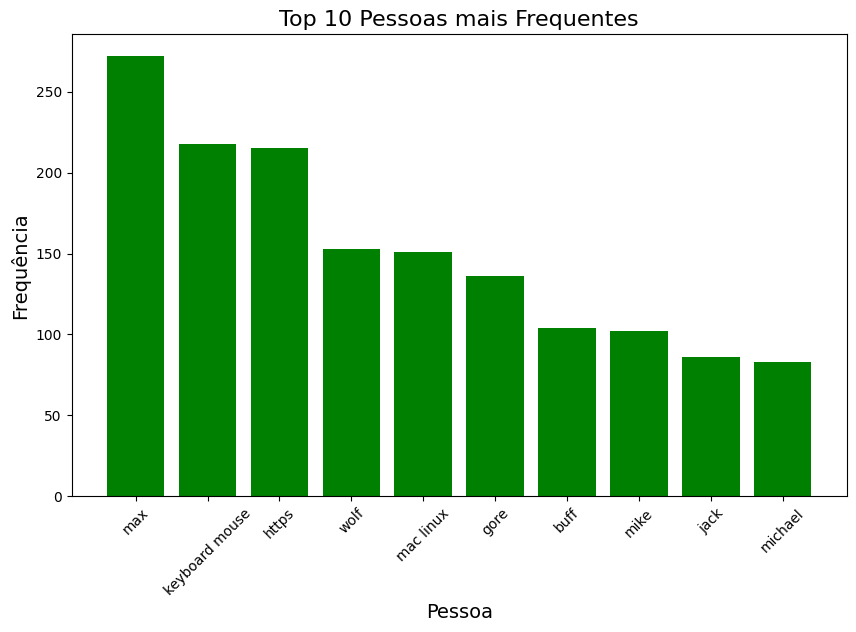

In [45]:
df['unique_persons'] = df['persons'].apply(lambda persons: set(persons))

all_persons = [person for sublist in df['unique_persons'] for person in sublist]
person_frequencies = Counter(all_persons)

person_df = pd.DataFrame(person_frequencies.items(), columns=['Person', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(person_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(person_df['Person'][:10], person_df['Frequency'][:10], color='green')  # Top 10 pessoas
plt.title('Top 10 Pessoas mais Frequentes', fontsize=16)
plt.xlabel('Pessoa', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Questão 4

### Letra A

In [46]:
import numpy as np
import keras

In [47]:
!wget http://www.manythings.org/anki/spa-eng.zip

--2024-10-20 16:14:54--  http://www.manythings.org/anki/spa-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5420295 (5,2M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   5,17M  3,58MB/s    in 1,4s    

2024-10-20 16:14:57 (3,58 MB/s) - ‘spa-eng.zip’ saved [5420295/5420295]



In [48]:
!unzip -q spa-eng.zip -d spa-eng

In [49]:
import os

batch_size = 64
epochs = 100
latent_dim = 256
num_samples = 10000

data_path = os.path.join("spa-eng", "spa.txt")

In [50]:
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split("\t")
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype="float32",
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

Number of samples: 10000
Number of unique input tokens: 69
Number of unique output tokens: 84
Max sequence length for inputs: 16
Max sequence length for outputs: 47


In [51]:
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [52]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
)

model.save("s2s_model.keras")

Epoch 1/100


/home/zadhart/Projects/NLP/venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_4', 'keras_tensor_8']. Received: the structure of inputs=('*', '*')
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6713 - loss: 1.6531 - val_accuracy: 0.6688 - val_loss: 1.2185
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7118 - loss: 1.0752 - val_accuracy: 0.6841 - val_loss: 1.1326
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7389 - loss: 0.9499 - val_accuracy: 0.7099 - val_loss: 1.0174
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7562 - loss: 0.8535 - val_accuracy: 0.7304 - val_loss: 0.9309
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7717 - loss: 0.7888 - val_accuracy: 0.7489 - val_loss: 0.8674
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7803 - loss: 0.7444 - val_accuracy: 0.7562 - val_loss: 0.8305
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7884 - loss: 0.7160 - val_accuracy: 0.7591 - val_loss: 0.8094
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7938 - loss: 0.6923 - val_accuracy

In [53]:
model = keras.models.load_model("s2s_model.keras")

encoder_inputs = model.input[0]
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]
decoder_state_input_h = keras.Input(shape=(latent_dim,))
decoder_state_input_c = keras.Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq, verbose=0)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value, verbose=0
        )

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        states_value = [h, c]
    return decoded_sentence


### Letra B

In [54]:
for seq_index in range(40):
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)


/home/zadhart/Projects/NLP/venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_2', 'keras_tensor_25', 'keras_tensor_26']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


-
Input sentence: Go.
Decoded sentence: Váya.

-
Input sentence: Go.
Decoded sentence: Váya.

-
Input sentence: Go.
Decoded sentence: Váya.

-
Input sentence: Go.
Decoded sentence: Váya.

-
Input sentence: Hi.
Decoded sentence: Haleba dentro.

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Run.
Decoded sentence: Corred.

-
Input sentence: Run.
Decoded sentence: Corred.

-
Input sentence: Who?
Decoded sentence: ¿Qué pino?

-
Input sentence: Wow!
Decoded sentence: ¡Entrate!

-
Input sentence: Duck!
Decoded sentence: ¡Agáchese!

-
Input sentence: Duck!
Decoded sentence: ¡Agáchese!

-
Input sentence: Duck!
Decoded sentence: ¡Agáchese!

-
Input sentence: Duck!
Decoded sentence: ¡Agáchese!

-
Input sentence: Duck!
Decoded sentence: ¡Agáchese!

-
Input sentence: Fire!
Decoded